# MNIST Handwritten Digits Classification using Deep Learning

Dataset: https://keras.io/api/datasets/mnist/ <br>
Github: https://github.com/RanjeetKumbhar01/MNIST-Handwritten-Digits-Classification-using-Deep-Learning

Enjoy the Notebook :)<br>
@Ranjeetkumbhar01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
# from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST data from keras .dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#shape of numpy arrays
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")
# x_train( 60k images of 28*28 dimention) Pixel values range from 0 to 255.
# y_train: digit labels (integers in range 0-9) 

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test  (10000, 28, 28)
Shape of y_test  (10000,)


Image Dimention -> 28 X 28 <br>
Grayscale image -> 1 channel

In [4]:
# printing the 10 images 
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [5]:
print(x_train[10].shape)

(28, 28)


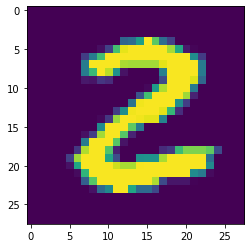

2


In [6]:
#displaying the image 
plt.imshow(x_train[25])
plt.show()

#printing corresponding label
print(y_train[25])

Image Labels

In [7]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [8]:
#unique values in Y_rain
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have the same dimension in this dataset, if not then convert it into same dimention to provide it to neural network

we can use these labels as such or we can also apply One hot encoding

In [9]:
#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value

In [10]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

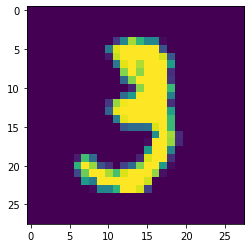

In [11]:
print(x_train[10])
plt.imshow(x_train[10])

#Bulding Neural Network

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

In [13]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#train neural network

In [14]:
history = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2914 - accuracy: 0.9150
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1363 - accuracy: 0.9595
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1018 - accuracy: 0.9689
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0833 - accuracy: 0.9743
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0695 - accuracy: 0.9780
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0614 - accuracy: 0.9805
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0528 - accuracy: 0.9831
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0467 - accuracy: 0.9844
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0400 - accuracy: 0.9869
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.037

<AxesSubplot: >

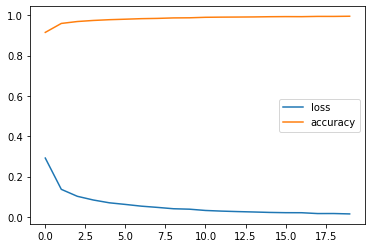

In [15]:
import pandas as pd
losses = pd.DataFrame(model.history.history)
losses.plot()

In [16]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1254 - accuracy: 0.9756


313/313 [==============================] - 1s 2ms/step


Text(0.5, 114.0, 'predicted label')

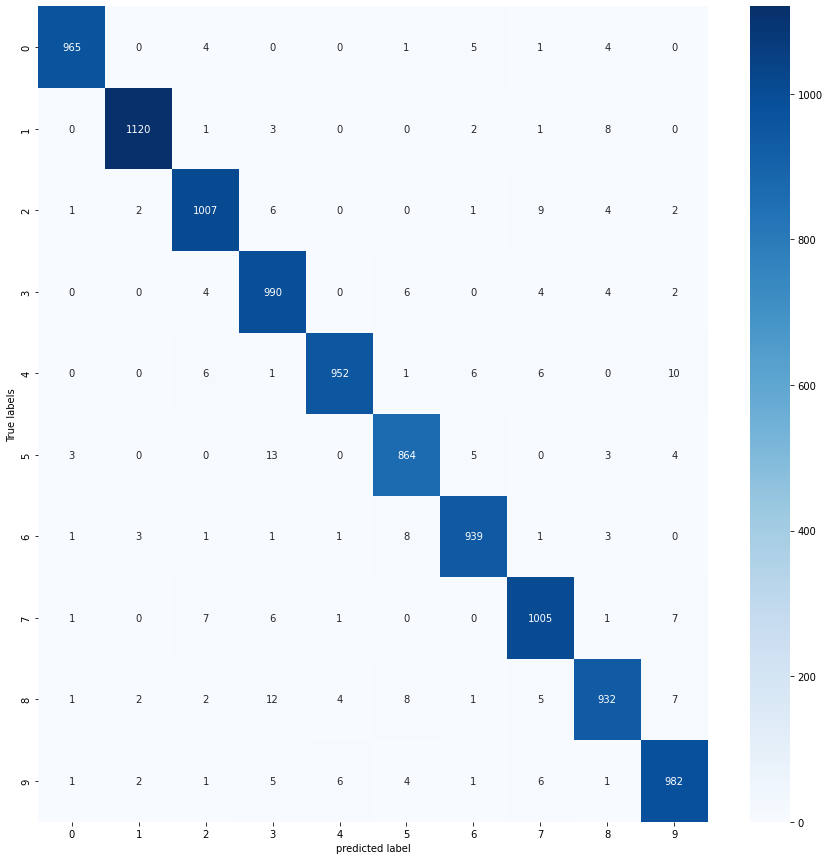

In [17]:
y_pred = model.predict(x_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
conf_mat = confusion_matrix(y_test,y_pred_labels)

plt.figure(figsize=(15,15))
sns.heatmap(conf_mat,annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel("predicted label")